<a href="https://colab.research.google.com/github/tatalo418/Programacion_itm/blob/main/Examen_institucional_codigofinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRIMER MOMENTO:** Procedemos a cargar el archivo suministrado para el ejercicio y verificar que este cargue correctamente.





In [3]:
from google.colab import files
import pandas as pd

# Subimos el archivo que descargamos a la memoria del PC
uploaded = files.upload()

# Nombre del archivo seleccionado
archivo = next(iter(uploaded)) # nombre del archivo seleccionado (cualquiera)

# Leemos el archivo seleccionado en CSV codificado con latin1
df = pd.read_csv(archivo, encoding='latin1')

# Mostrar las primeras filas del archivo para confirmar que se cargó correctamente
print(df.head())

Saving Flujos_de_caja (1).csv to Flujos_de_caja (1) (2).csv
  Proyecto;Inversion_Inicial;Ao_1;Ao_2;Ao_3;Ao_4;Ao_5;Ao_6;Ao_7;Ao_8;Ao_9;Ao_10
0  Winston Smith;-85682867;5570451;16720657;78014...                                     
1  Julia;-76755036;5967344;6490687;17913082;59552...                                     
2  O'Brien;-76882282;16243667;18070601;16252748;1...                                     
3  Big Brother;-41081788;7412149;14311768;1695307...                                     
4  Don Quijote;-33315092;10398869;16991292;118397...                                     


Separamos los datos suministrados por columnas, teniendo en cuenta que el icono que separa un dato de otro es el ";" y renombramos las columnas con nombres mas
apropiados para cada una de ellas

In [38]:
import pandas as pd

# Seleciconamos el archivo sobre el que estamos trabajando
archivo = 'Flujos_de_caja (1).csv'

# Leer el archivo CSV con codificación adecuada y separar por columnas cada que aparezca un punto y coma
df = pd.read_csv(archivo, encoding='latin1', sep=';')

# Aqui nombramos cada una de las columnas, por lo que, los nombre son un poco confusos
df.columns = ['Capitalizador', 'Inversion_Inicial'] + [f'Año{i}' for i in range(1, 11)]

# Mostrar las primeras filas para ver que el archivo haya tomado los cambios ingresados
print(df.head())

   Capitalizador  Inversion_Inicial      Año1      Año2      Año3      Año4  \
0  Winston Smith          -85682867   5570451  16720657   7801445  18051670   
1          Julia          -76755036   5967344   6490687  17913082   5955205   
2        O'Brien          -76882282  16243667  18070601  16252748  15511699   
3    Big Brother          -41081788   7412149  14311768  16953070   5966649   
4    Don Quijote          -33315092  10398869  16991292  11839789  20617892   

       Año5      Año6      Año7      Año8      Año9     Año10  
0  15958457  12517201   5862839  20146580  19444292  24566746  
1  17184923  24685303  20474106  17186651   9233384  13512686  
2  20448040   5658139  15070853  13582851  17689154  18385842  
3   8775702  24747640  22841583  19143933  18412066  12835958  
4   9090284  20860467  22012114  17840143  20194144  10923808  


**SEGUNDO MOMENTO:** Continuamos, vamos a revisar la información del archivo CSV, verificar los datos generales del data frame (CSV), revisar también datos estadisticos que se pueden extraer del archivo. Revisar si hay datos nulos, cuantos valores nulos hay por columna, verificar si hay celdas vacias y cuantas celdas vacias hay por columna.

In [39]:
# Ver la información general del data frame (csv)
print("Información general del DataFrame:")
print(df.info())
print("\n")

# estadísticas generales
print("Resumen estadístico:")
print(df.describe())
print("\n")

# Verificar si hay valores nulos en el DataFrame
print("¿Existen valores que sean nulos?:", df.isnull().values.any())
print("\n")

# Contar cuántos valores nulos hay por columna
print("Cantidad de valores nulos por columna:")
print(df.isnull().sum())
print("\n")

# También puedes verificar si hay celdas vacías (cadenas vacías)
print("¿Existen celdas vacias?:", (df == '').any().any())
print("\n")

# Contar cuántas celdas vacías hay por columna
print("Cantidad de celdas vacías por columna:")
print((df == '').sum())

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Capitalizador      1000 non-null   object
 1   Inversion_Inicial  1000 non-null   int64 
 2   Año1               1000 non-null   int64 
 3   Año2               1000 non-null   int64 
 4   Año3               1000 non-null   int64 
 5   Año4               1000 non-null   int64 
 6   Año5               1000 non-null   int64 
 7   Año6               1000 non-null   int64 
 8   Año7               1000 non-null   int64 
 9   Año8               1000 non-null   int64 
 10  Año9               1000 non-null   int64 
 11  Año10              1000 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 93.9+ KB
None


Resumen estadístico:
       Inversion_Inicial          Año1          Año2          Año3  \
count       1.000000e+03  1.000000e+03  1.000000e+0

**TERCER MOMENTO:** Ahora debemos calcular el valor presento para cada inversionista, teniendo en cuenta que la inversión esta proyectada a 10 años. Es decir, que vamos a traer cada uno de los periodos donde se reciben "dividendos" al año actual, y, de esta manera, analizar si la inversión es rentable. Donde se puede deducir si primero se obtiene un punto de equilibrio (no perdidas). Y, después analizar cual es el margen o porcentaje de ganancia en los 10 años proyectados.

Para ello, debemos crear una función que nos realice la ejecución de la formula del VPN, donde nos tome todos los poyectos por inversionista. Se uso una tasa de descuento del 12%. Por ultimo, guardamos el resultado en una nueva columna denominada como "VPN"

In [40]:
# Función para calcular el VPN de un proyecto
def calcular_vpn(flujos, tasa_descuento):
    vpn = 0
    for t in range(len(flujos)):
        vpn += flujos[t] / ((1 + tasa_descuento) ** t)
    return vpn

# Definir la tasa de descuento (12%)
tasa = 0.12

# Asegurarse de que los nombres de las columnas coincidan con los esperados
columnas_flujo = ['Inversion_Inicial'] + [f'Año{i}' for i in range(1, 11)]

# Calcular el VPN para cada proyecto
df['VPN'] = df.apply(
    lambda fila: calcular_vpn([fila[col] for col in columnas_flujo], tasa),
    axis=1
)

# Ver resultados
df[['Capitalizador', 'VPN']].head()

,Capitalizador,VPN
0,Winston Smith,-9.247149e+06
1,Julia,-3.577146e+06
2,O'Brien,1.252428e+07
3,Big Brother,3.915842e+07
4,Don Quijote,5.473385e+07


**CUARTO MOMENTO:** En este punto, debemos calcular la tasa interna de retorno que nos demuestra que tan rentable es un proyecto o negocio en puntos porcentuales. Por lo general, si la TIR es mayor que la tasa de descuento el proyecto se puede tomar con rentable y apropiado para el inversionista.

Para calcularla vamos a esar la función irr() de la librería numpy_financial, que toma los flujos de caja y devuelve la tasa que haría que el VPN sea igual a cero.

Si aplica esta función para cada inversionista y al final guardamos el resultados en una nueva columna nombrada como TIR

In [36]:
pip install numpy-financial # Aseguramos tener instalada la libreria

In [41]:
import numpy_financial as npf  # Importar librería financiera

# Calcular la TIR para cada proyecto
df['TIR'] = df.apply(
    lambda fila: npf.irr(
        [fila['Inversion_Inicial']] + [fila[f'Año{i}'] for i in range(1, 11)]
    ),
    axis=1
)

# Mostrar resultados
from IPython.display import display
display(df[['Capitalizador', 'VPN', 'TIR']])

,Capitalizador,VPN,TIR
0,Winston Smith,-9.247149e+06,0.096411
1,Julia,-3.577146e+06,0.109983
2,O'Brien,1.252428e+07,0.159578
3,Big Brother,3.915842e+07,0.292613
4,Don Quijote,5.473385e+07,0.418964
...,...,...,...
995,Alyosha KaramÃ¡zov el Sabio del Desierto III I...,6.288136e+07,0.636860
996,Alyosha KaramÃ¡zov el Sabio del Desierto III I...,2.041290e+07,0.187365
997,Odiseo el Sabio el Rojo el Sabio II I,1.988916e+07,0.209139
998,Moriarty la Eterna el Rojo II,-1.220200e+06,0.116199


**QUINTO MOMENTO:**Una vez calculado el VPN y TIR, vamos a detallar los resultados haciendo uso de objetos visuales para identificar de una forma mas practica los resultados obtenidos, para ello, empleamos la libreria de matplotlib.

Se hizo un grafico para visualizar cuales proyectos estan por encima de la de descuento del 12%, y, por lo tanto se asume que son rentables (al ser tantos no se logra observar la información completamente)

Después, un grafico que me muestra los 15 capitalizadores con mayor TIR.

Por ultimo, un grafico que me muestra los 10 capitalizadores con mayor VPN

También se filtraron los proyectos que son rentables, es decir, los que tienen un VPN mayor que cero en pesos y una TIR superior al 12%. De esta manera, se obtienen los capitalizadores mas "jugosos"

<ipython-input-69-5782d22547ad>:17: UserWarning: Glyph 154 (\x9a) missing from font(s) DejaVu Sans.
  plt.tight_layout()


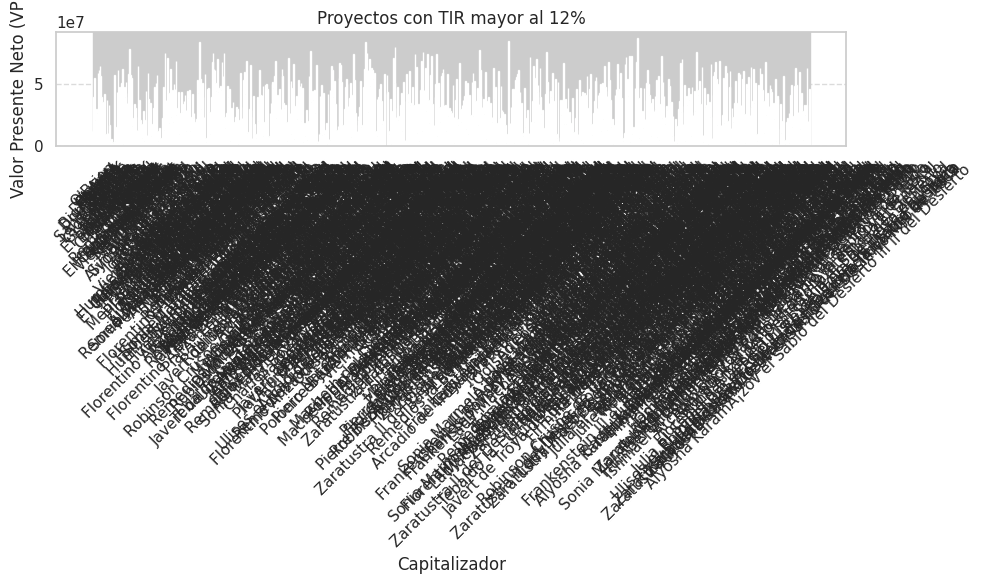

In [69]:
import matplotlib.pyplot as plt

# Filtrar proyectos con TIR mayor a la tasa de descuento
tasa_descuento = 0.12
proyectos_rentables = df[df['TIR'] > tasa_descuento]

# Gráfico de barras: Inversionista vs VPN
plt.figure(figsize=(10, 6))
plt.bar(proyectos_rentables['Capitalizador'], proyectos_rentables['VPN'], color='green')

plt.xlabel('Capitalizador')
plt.ylabel('Valor Presente Neto (VPN)')
plt.title('Proyectos con TIR mayor al 12%')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

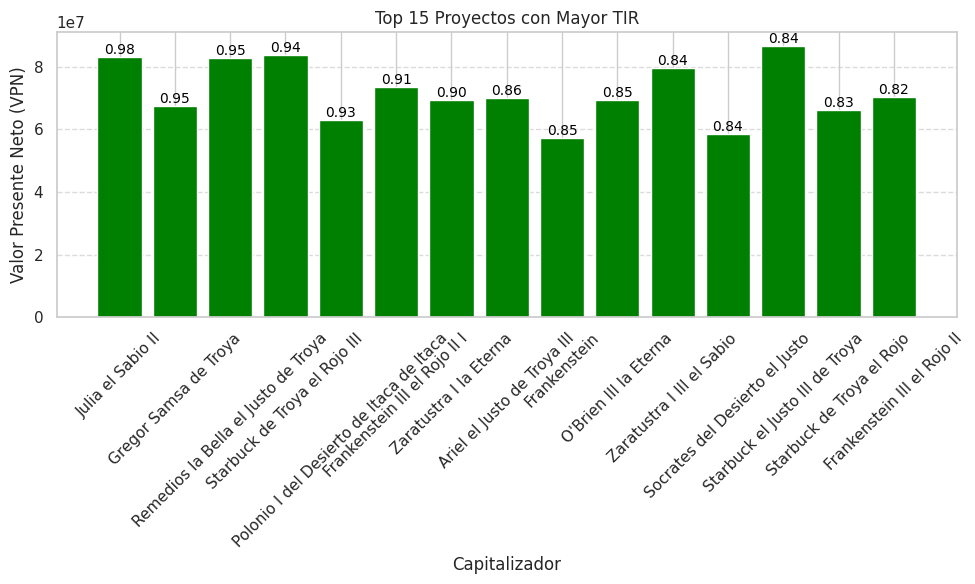

In [70]:
import matplotlib.pyplot as plt

# Filtrar los 15 proyectos con mayor TIR
top_15_proyectos = df.nlargest(15, 'TIR')

# Gráfico de barras: Capitalizador vs VPN para los 15 proyectos con mayor TIR
plt.figure(figsize=(10, 6))
bars = plt.bar(top_15_proyectos['Capitalizador'], top_15_proyectos['VPN'], color='green')

# Añadir las etiquetas de la TIR encima de las barras
for bar, tir in zip(bars, top_15_proyectos['TIR']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02,  # Posiciona la etiqueta un poco arriba de la barra
             f'{tir:.2f}', ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Capitalizador')
plt.ylabel('Valor Presente Neto (VPN)')
plt.title('Top 15 Proyectos con Mayor TIR')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

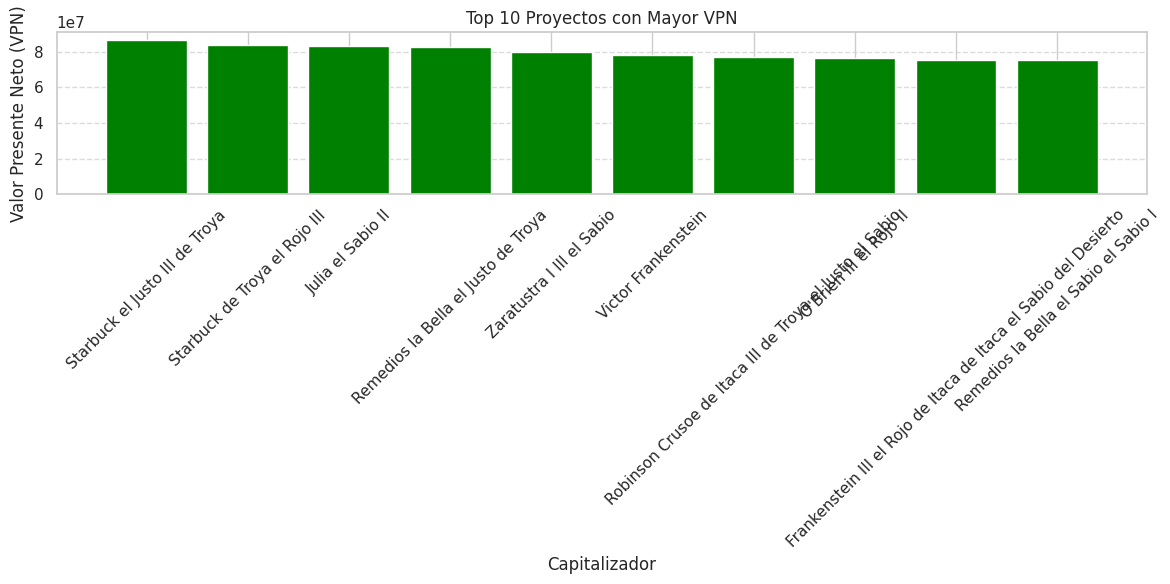

In [71]:
import matplotlib.pyplot as plt

# Filtrar los 10 proyectos con mayor VPN
top_10_proyectos_vpn = df.nlargest(10, 'VPN')

# Gráfico de barras: Proyectos vs VPN para los 10 proyectos con mayor VPN
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_proyectos_vpn['Capitalizador'], top_10_proyectos_vpn['VPN'], color='green')

# Titulos de todos los ejes
plt.xlabel('Capitalizador')
plt.ylabel('Valor Presente Neto (VPN)')
plt.title('Top 10 Proyectos con Mayor VPN')

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Eliminar etiquetas de las barras apiladas
plt.tight_layout()
plt.show()

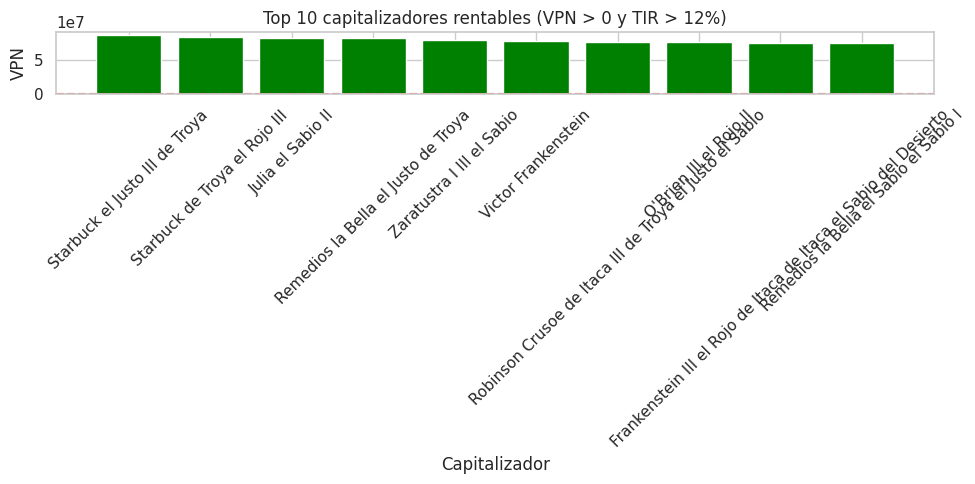

In [72]:
# Filtro de proyectos rentables
proyectos_rentables = df[(df['VPN'] > 0) & (df['TIR'] > 0.12)]

# solo los 10 con mayor VPN
proyectos_rentables_top = proyectos_rentables.nlargest(10, 'VPN')

plt.figure(figsize=(10, 5))
plt.bar(proyectos_rentables_top['Capitalizador'], proyectos_rentables_top['VPN'], color='green')
plt.axhline(0, color='red', linestyle='--')
plt.title('Top 10 capitalizadores rentables (VPN > 0 y TIR > 12%)')
plt.xlabel('Capitalizador')
plt.ylabel('VPN')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**SEXTO MOMENTO:** Para navegar sobre el analisis se crea un menú interactivo haciendo uso de la libreria ipwydgets. Esto dará lugar a que cualquier persona puede ver la ejecución de los resultados obtenidos sin la necesidad de ejecutar cada celda manualmente.

El menú tiene cuatro botones: uno para ver los datos originales, otro para ver los indicadores financieros (VPN y TIR), uno más para ver los gráficos de los proyectos rentables, y un botón de salir que limpia la pantalla.
También se ordeno el diseño para que los botones aparezcan en forma vertical, como una lista ordenada.

In [75]:
# Importar librerías necesarias
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

# ======== FUNCIONES ========

def ver_datos(b):
    clear_output()
    mostrar_menu()
    display(df.head())

def ver_indicadores(b):
    clear_output()
    mostrar_menu()
    display(df[['Capitalizador', 'VPN', 'TIR']])

def ver_graficos(b):
    clear_output()
    mostrar_menu()

    # Filtro de proyectos rentables
    proyectos_rentables = df[(df['VPN'] > 0) & (df['TIR'] > 0.12)]

    # Seleccionar solo los 10 con mayor VPN
    proyectos_rentables_top = proyectos_rentables.nlargest(10, 'VPN')

    # Graficar
    plt.figure(figsize=(10, 5))
    plt.bar(proyectos_rentables_top['Capitalizador'], proyectos_rentables_top['VPN'], color='green')
    plt.axhline(0, color='red', linestyle='--')
    plt.title('📈 Top 10 capitalizadores rentables (VPN > 0 y TIR > 12%)', fontsize=14)
    plt.xlabel('Capitalizador')
    plt.ylabel('VPN')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def salir(b):
    clear_output()

def mostrar_menu():
    display(menu_box)

# ======== WIDGETS ========

# Crear botones con estilos mejorados
btn_datos = widgets.Button(description='📊 Ver Datos', button_style='primary')
btn_indicadores = widgets.Button(description='📈 Ver Indicadores', button_style='info')
btn_graficos = widgets.Button(description='📉 Ver Gráficos', button_style='success')
btn_salir = widgets.Button(description='❌ Salir', button_style='danger')

# Asignar acciones a los botones
btn_datos.on_click(ver_datos)
btn_indicadores.on_click(ver_indicadores)
btn_graficos.on_click(ver_graficos)
btn_salir.on_click(salir)

# Agrupar botones en una línea horizontal
botones = widgets.HBox([btn_datos, btn_indicadores, btn_graficos, btn_salir])

# Caja principal con título
menu_box = widgets.VBox([
    widgets.HTML("<h3>📌 Selecciona una opción:</h3>"),
    botones
])

# Mostrar el menú
mostrar_menu()

**ULTIMO MOMENTO SUSTENTACION:**

Se realizo un ejercicio sobre una base de datos de formato CSV acerca 1000 capitalizadores que realizaron una inversión inicial y una proyección de ganancias por alrededor de 10 años. Inicialmente se revisa esta base de datos, con el fin de buscar que no existan celdas con datos nulos o vacios, y, consiguientemente extraer los datos estadisticos de la base de datos.

Continuamente, se realizan calculos financieros como el VPN, para calcular en pesos si la inversion es rentable para el capitalizador. Es decir, que las ganancias obtenidas durante un periodo de 10 años superen la inversión inicial, es necesario tener en cuenta que se tomo una tasa de descuento fija del 12%, es decir, un valor duplicado del IPC durante la ultima decada. También cabe aclarar que las ganancias de cada periodo se traen al periodo de la inversión inicial.

Después se calcula la TIR, que nos muestra en puntos porcentuales cual es la ganancia obtenida de la inversion proyectada a las 10 años en un periodo en especifico. Si esta es mayor a la tasa de descuento, la inversión es rentable.

Continuamente, se comparan ambos graficos mediante objetos visuales para observar cuales son los proyectos mas viables desde el ambito financiero y que puedan contribuir a una mejor toma de decisiones. Y se crea un manual de botones que permite visualizar las acciones creadas dentro del algoritmo mas resumidamente y focalizada en la información trascendental.

En conclusión, se ponen a prueba conocimientos tecnicos y teoricos adiquiridos durante el desarrollo profesional en cuanto a finanzas se refiere y las capacidades adquiridas hasta ahora en programación, de tal manera que estas puedas ser aplicadas en un contexto laboral y aplicado.

